# `tabula-rasa/py/sklearn/B.ipynb`

---

My solutions for part B of [/12_mod_scikitlearn/05-Exercises.ipynb](https://github.com/lrangellara/tts-ds-fundamentals-course/blob/main/datascience/python/12_mod_scikitlearn/05-Exercises.ipynb)

## 🐍 Python imports 🐍

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing

## 🎨 Styling 🎨

In [2]:
# plt.style.use("./../../style/ai.mplstyle")

path = os.path.join(".", "..", "..", "style", "ai.mplstyle")
plt.style.use(path)

## 📁 Data loading 📁

In [3]:
# pd.read_csv("./../../data/iris.csv")

path = os.path.join(".", "..", "..", "data", "iris.csv")
df = pd.read_csv(path)

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## ❄ Exercise 1.

---

Write a Python program to create a plot to get a general Statistics of Iris data.

In [4]:
df_describe = df.describe()
df_describe.drop(columns="Id", inplace=True)

df_describe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


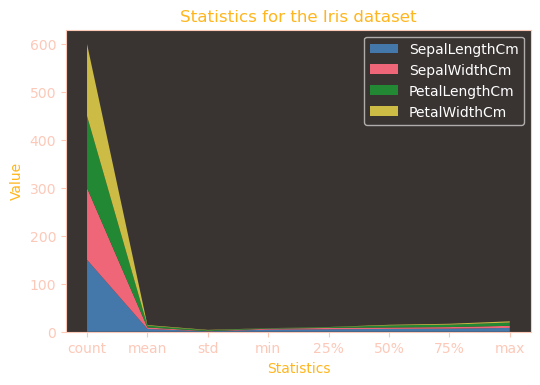

In [5]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=100)

x = df_describe.index
y = [df_describe[column] for column in df_describe.columns]

ax.stackplot(x, y, labels=df_describe.columns)

plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("Statistics for the Iris dataset")

plt.legend(loc="upper right")

plt.show()

In [6]:
df_describe_drop_count = df_describe.drop(index="count", inplace=False)

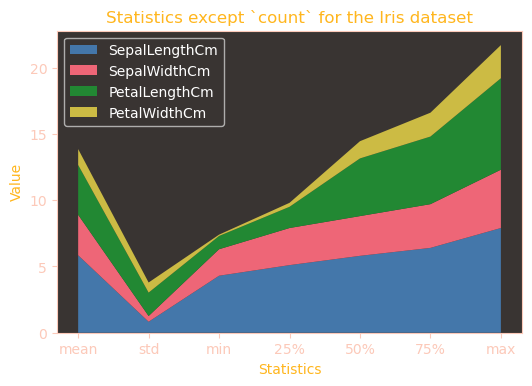

In [7]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=100)

x = df_describe_drop_count.index
y = [df_describe_drop_count[column] for column in df_describe_drop_count.columns]

ax.stackplot(x, y, labels=df_describe_drop_count.columns)

plt.xlabel("Statistics")
plt.ylabel("Value")
plt.title("Statistics except `count` for the Iris dataset")

plt.legend(loc="upper left")

plt.show()

## 🌸 Exercise 2.

---

Write a Python program to create a Bar plot to get the frequency of the three species of the Iris data.

In [8]:
df_species_value_counts = df["Species"].value_counts()

df_species_value_counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

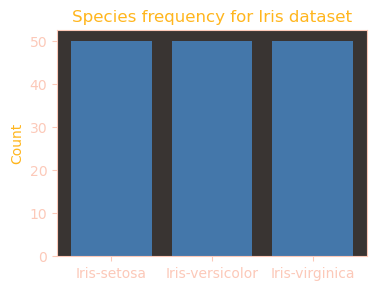

In [9]:
fig, ax = plt.subplots(figsize=[4, 3], dpi=100)

x = df_species_value_counts.index
height = df_species_value_counts

plt.bar(x, height)

plt.ylabel("Count")
plt.title("Species frequency for Iris dataset")

plt.show()

## ❄ Exercise 3.

---

Write a Python program to create a Pie plot to get the frequency of the three species of the Iris data.

In [10]:
df_species_value_counts = df["Species"].value_counts()

df_species_value_counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

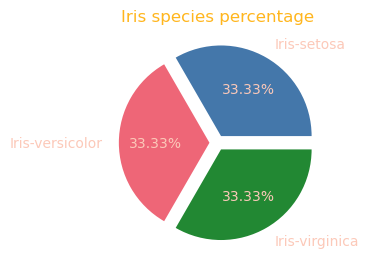

In [11]:
fig, ax = plt.subplots(figsize=[5, 3], dpi=100)

ax.pie(
    df_species_value_counts,
    explode=[0.085, 0.085, 0.085],
    labels=df_species_value_counts.index,
    autopct="%1.2f%%",
    labeldistance=1.175,
)

plt.title("Iris species percentage")

plt.show()

## 🌸 Exercise 4.

---

Write a Python program to create a graph to find relationship between the sepal length and width.

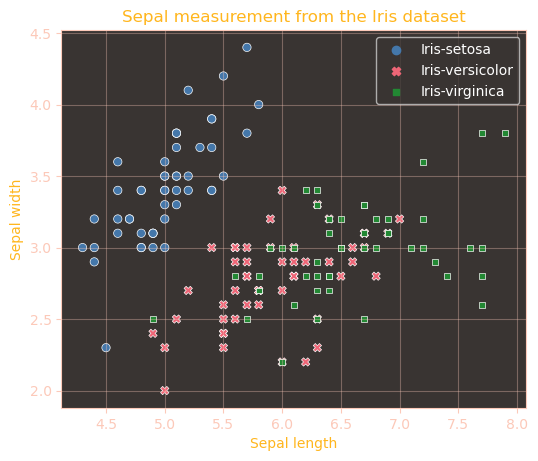

In [12]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)

sns.scatterplot(
    ax=ax, data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", style="Species"
)

ax.grid(alpha=0.35)

plt.title("Sepal measurement from the Iris dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.legend(loc="upper right")

plt.show()

## ❄ Exercise 5.

---

Write a Python program to create a graph to find relationship between the petal length and width.

In [13]:
df.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


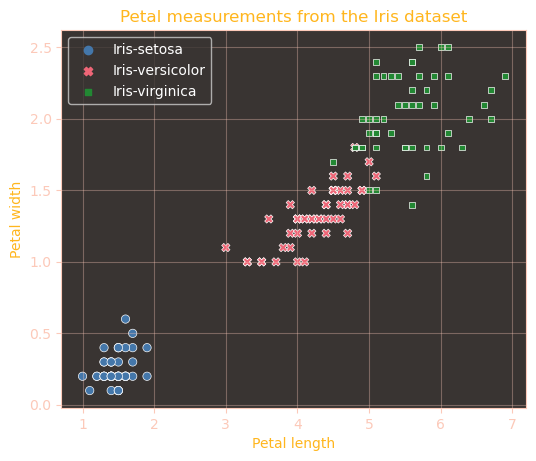

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)

sns.scatterplot(
    ax=ax, data=df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", style="Species"
)

ax.grid(alpha=0.35)

plt.title("Petal measurements from the Iris dataset")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.legend(loc="upper left")

plt.show()

## 🌸 Exercise 6.

---

Write a Python program to create a graph to see how the length and width of SepalLength, SepalWidth, PetalLength, PetalWidth are distributed.

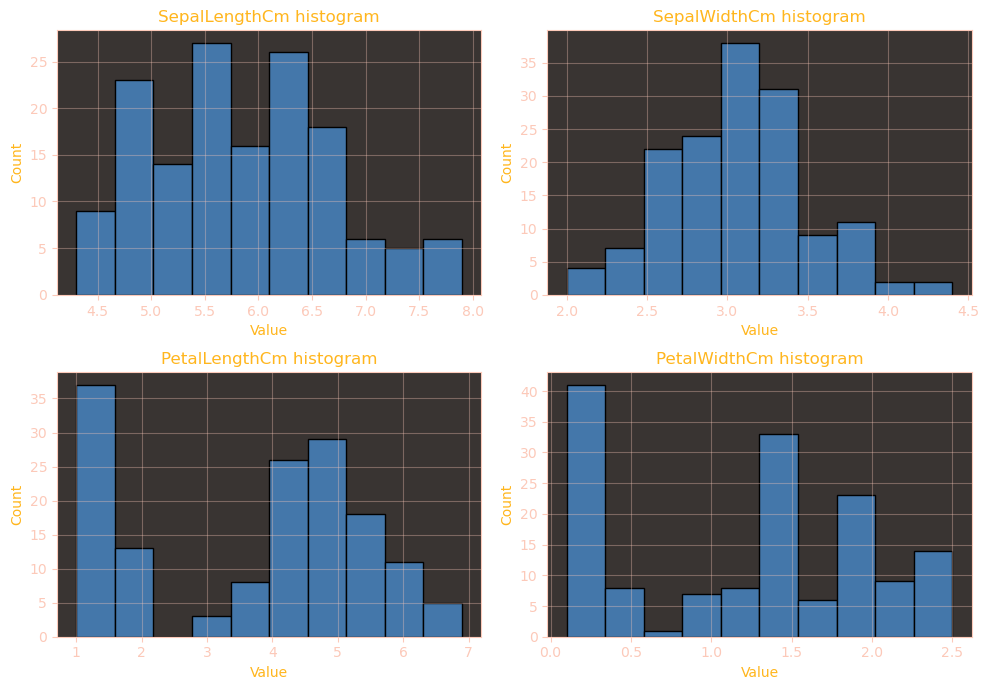

In [15]:
fig, axs = plt.subplots(2, 2, figsize=[10, 7], dpi=100)
alpha_value = 0.35

axs[0, 0].hist(df["SepalLengthCm"], edgecolor="black")
axs[0, 0].set_title("SepalLengthCm histogram")
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_xlabel("Value")
axs[0, 0].grid(alpha=alpha_value)

axs[0, 1].hist(df["SepalWidthCm"], edgecolor="black")
axs[0, 1].set_title("SepalWidthCm histogram")
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_xlabel("Value")
axs[0, 1].grid(alpha=alpha_value)

axs[1, 0].hist(df["PetalLengthCm"], edgecolor="black")
axs[1, 0].set_title("PetalLengthCm histogram")
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_xlabel("Value")
axs[1, 0].grid(alpha=alpha_value)

axs[1, 1].hist(df["PetalWidthCm"], edgecolor="black")
axs[1, 1].set_title("PetalWidthCm histogram")
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_xlabel("Value")
axs[1, 1].grid(alpha=alpha_value)

fig.tight_layout(h_pad=1)

plt.show()

## ❄ Exercise 7.

---

Write a Python program to create a joinplot to describe individual distributions on the same plot between Sepal length and Sepal width. Note: joinplot - Draw a plot of two variables with bivariate and univariate graphs.

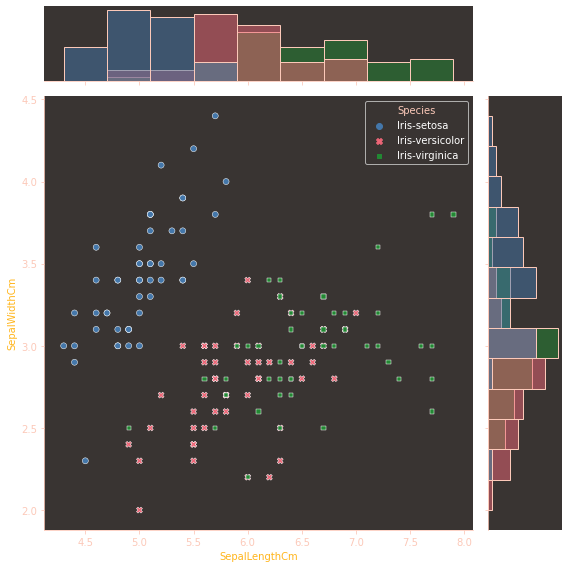

In [16]:
g = sns.JointGrid(data=df, x="SepalLengthCm", y="SepalWidthCm", height=8)

g.plot_joint(sns.scatterplot, data=df, hue="Species", style="Species")

g.plot_marginals(sns.histplot, data=df, hue="Species")

plt.show()

## 🌸 Exercise 8.

---

Write a Python program to create a joinplot using "hexbin" to describe individual distributions on the same plot between Sepal length and Sepal width. Note: The bivariate analogue of a histogram is known as a "hexbin" plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib plt.hexbin function and as a style in jointplot(). It looks best with a white background.

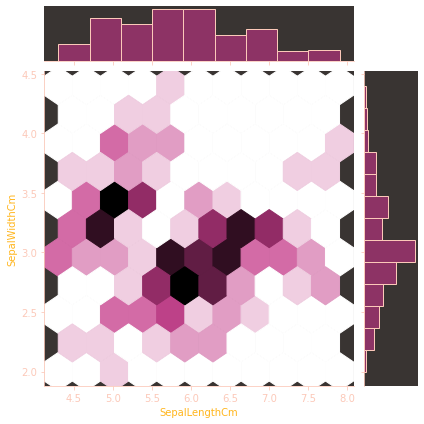

In [17]:
sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", kind="hex", color="#AA3377")
plt.show()

## ❄ Exercise 9.

---

Write a Python program to create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width. Note: The kernel density estimation (kde) procedure visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot().

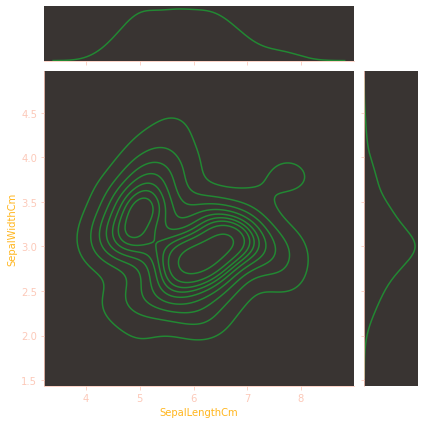

In [18]:
sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", kind="kde", color="#228833")
plt.show()

## 🌸 Exercise 10.

---

Write a Python program to create a joinplot and add regression and kernel density fits using "reg" to describe individual distributions on the same plot between Sepal length and Sepal width.

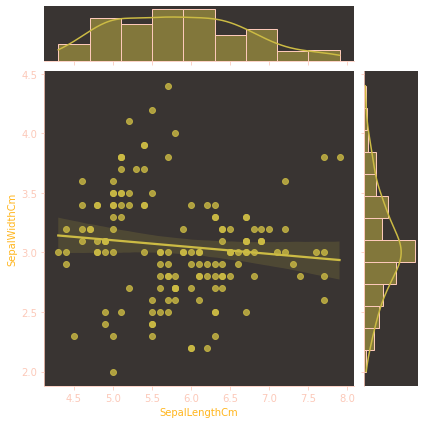

In [19]:
sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", kind="reg", color="#CCBB44")

plt.show()

## ❄ Exercise 11.

---

Write a Python program to draw a scatterplot, then add a joint density estimate to describe individual distributions on the same plot between Sepal length and Sepal width.

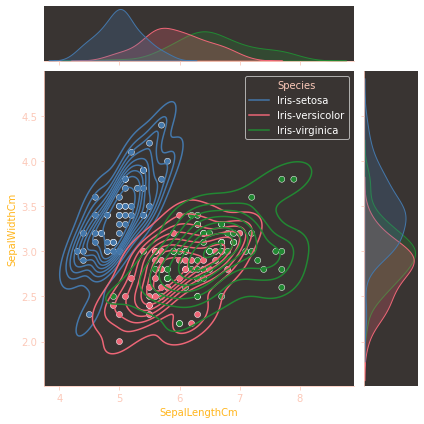

In [20]:
g = sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

g.plot_joint(sns.kdeplot)
plt.show()

## 🌸 Exercise 12.

---

Write a Python program to create a joinplot using "kde" to describe individual distributions on the same plot between Sepal length and Sepal width and use '+' sign as marker. Note: The kernel density estimation (kde) procedure visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot().

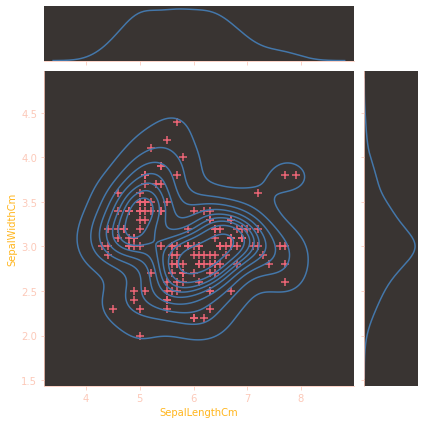

In [21]:
g = sns.jointplot(data=df, x="SepalLengthCm", y="SepalWidthCm", kind="kde")

g.plot_joint(sns.scatterplot, color="#EE6677", s=50, linewidth=1.5, marker="+")

plt.show()

## ❄ Exercise 13.

---

Write a Python program to create a pairplot of the iris data set and check which flower species seems to be the most separable.

In [22]:
df_drop_id = df.drop(columns="Id", inplace=False)

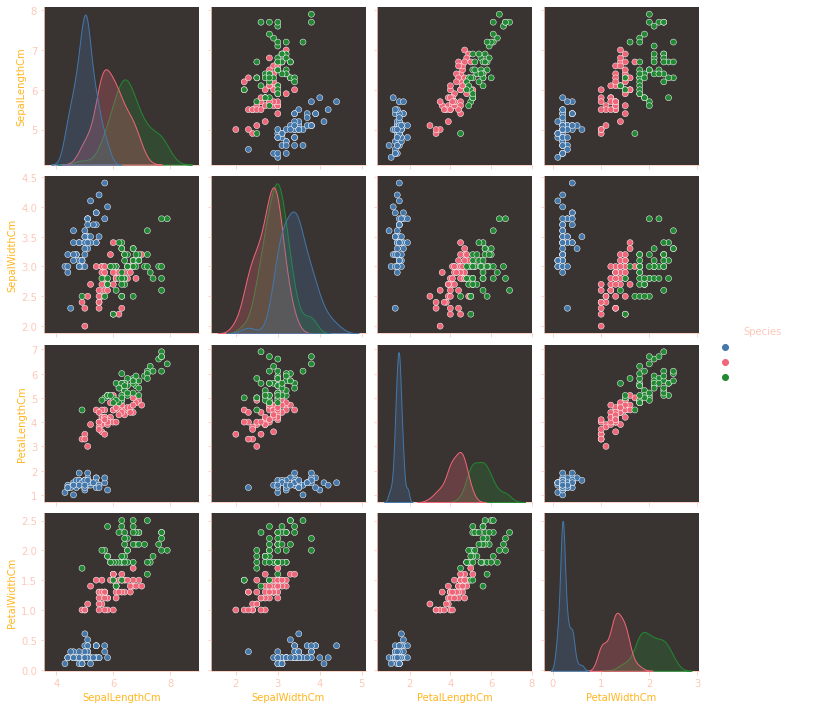

In [23]:
sns.pairplot(data=df_drop_id, hue="Species")

plt.show()

## 🌸 Exercise 14.

---

Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of sepal_length versus sepal width for setosa species of flower.

In [24]:
ser = df["Species"] == "Iris-setosa"
df_setosa = df[ser]

df_setosa.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [25]:
df_setosa_sepal = df_setosa[["SepalLengthCm", "SepalWidthCm"]]

df_setosa_sepal.head(3)

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


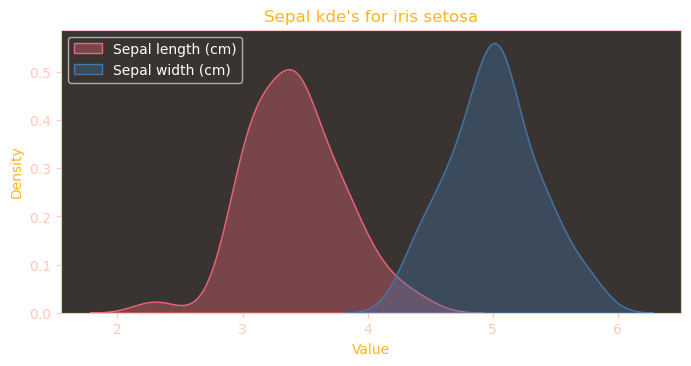

In [26]:
fig, ax = plt.subplots(figsize=[8, 3.75], dpi=100)

sns.kdeplot(ax=ax, data=df_setosa_sepal, fill=True, alpha=0.35)

plt.xlabel("Value")
plt.title("Sepal kde's for iris setosa")

plt.legend(labels=["Sepal length (cm)", "Sepal width (cm)"], loc="upper left")

plt.show()

## ❄ Exercise 15.

---

Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of petal_length versus petal width for setosa species of flower.

In [27]:
ser = df["Species"] == "Iris-setosa"
df_setosa = df[ser]

df_setosa.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [28]:
df_setosa_petal = df_setosa[["PetalLengthCm", "PetalWidthCm"]]

df_setosa_petal.head(3)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


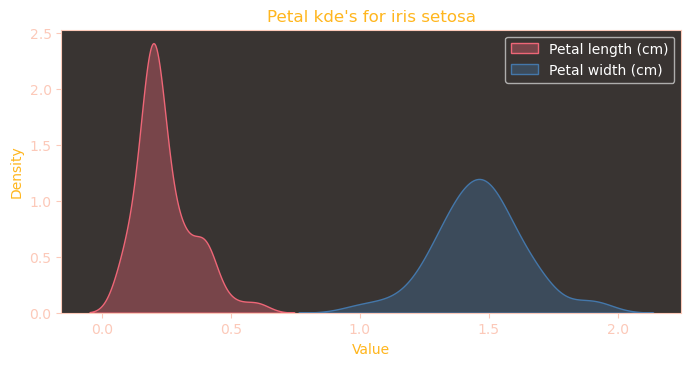

In [29]:
fig, ax = plt.subplots(figsize=[8, 3.75], dpi=100)

sns.kdeplot(ax=ax, data=df_setosa_petal, fill=True, alpha=0.35)

plt.xlabel("Value")
plt.title("Petal kde's for iris setosa")

plt.legend(labels=["Petal length (cm)", "Petal width (cm)"], loc="upper right")

plt.show()

## 🌸 Exercise 16.

---

Write a Python program using seaborn to Create a kde (Kernel Density Estimate ) plot of petal_length versus petal width for setosa species of flower.

In [30]:
ser = df["Species"] == "Iris-setosa"
df_setosa = df[ser]

df_setosa.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [31]:
df_setosa_petal = df_setosa[["PetalLengthCm", "PetalWidthCm"]]

df_setosa_petal.head(3)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


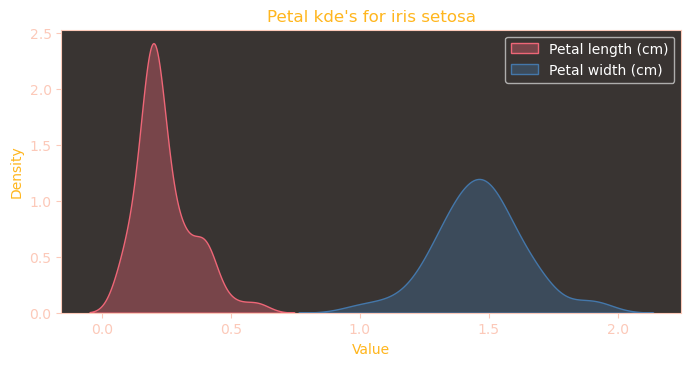

In [32]:
fig, ax = plt.subplots(figsize=[8, 3.75], dpi=100)

sns.kdeplot(ax=ax, data=df_setosa_petal, fill=True, alpha=0.35)

plt.xlabel("Value")
plt.title("Petal kde's for iris setosa")

plt.legend(labels=["Petal length (cm)", "Petal width (cm)"], loc="upper right")

plt.show()

## ❄ Exercise 17.

---

Write a Python program to find the correlation between variables of iris data. Also create a hitmap using Seaborn to present their relations.

In [33]:
df_measurements = df.drop(columns=["Id", "Species"], inplace=False)

df_measurements

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
corr = df_measurements.corr()

corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


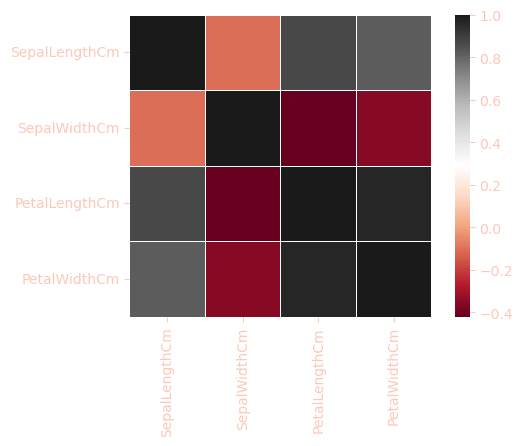

In [35]:
fig, ax = plt.subplots(figsize=[6, 4], dpi=100)

sns.heatmap(ax=ax, data=corr, square=True, linewidths=0.65, cmap="RdGy")

plt.show()

## 🌸 Exercise 18.

---

Write a Python program to create a box plot (or box-and-whisker plot) which shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable of iris dataset. Use seaborn.

In [36]:
plt.style.use("dark_background")

In [37]:
df_drop_id = df.drop(columns="Id", inplace=False)

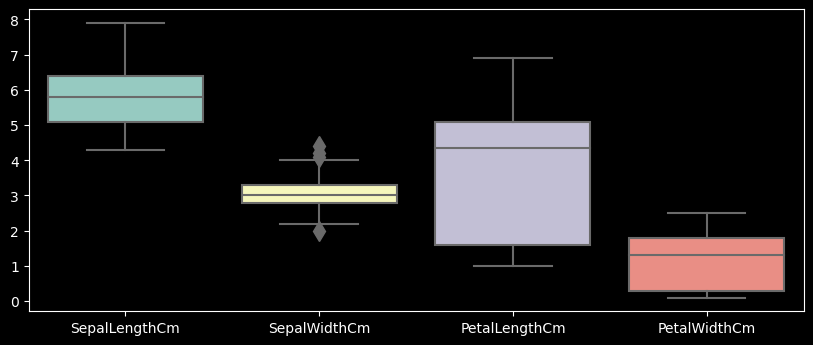

In [38]:
fig, ax = plt.subplots(figsize=[10, 4], dpi=100)

g = sns.boxplot(ax=ax, data=df_drop_id, fliersize=10)

## ❄ Exercise 19.

---

Write a Python program to create a Principal component analysis (PCA) of iris dataset.

## Solution

This is the code from the sample solution:
https://www.w3resource.com/machine-learning/scikit-learn/iris/python-machine-learning-scikit-learn-iris-basic-exercise-8.php

My understanding is that PCA is essentially an application of the singular value decompoosition, i.e.
taking the [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) of the data and finding the largest singular values there.

Its not clear to me why a 3D visualization is needed here, but I have modified the sample solution code to at least run on the versions of packages I have installed.

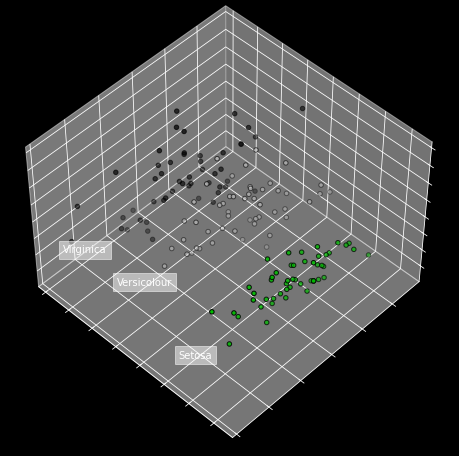

In [42]:
iris = df
# Converting string labels into numbers.
# creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
# Drop id column
iris = iris.drop("Id", axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

fig = plt.figure(1, figsize=(7, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float64)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()